# Submission Machine Learning Terapan Data Kanker Paru-Paru

## 1. Import Package

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
!pip install kagglehub
import kagglehub

## 2. Import Dataset
Dataset yang digunakan pada proyek ini merupakan basis data yang diambil dari pasien yang komprehensif, dikhususkan pada individu yang didiagnosis menderita kanker paru-paru. Diambil dari platform [Kaggle](kaggle.com/datasets/amankumar094/lung-cancer-dataset) dengan judul Lung Cancer Dataset, basis data ini dibuat untuk menganalisis berbagai faktor pengobatan yang dapat mempengaruhi diagnosis kanker dan pengobatan. Terdiri dari 890.000 data dan 16 variabel pengamatan yang terdiri dari kondisi medis pasien.


In [2]:
# Download latest version
path = kagglehub.dataset_download("amankumar094/lung-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lung-cancer-dataset


In [3]:
file_path = os.path.join(path, 'dataset_med.csv')
df = pd.read_csv(file_path)
df = df.drop(columns=['id'])
df

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


Data terdiri dari 890000 baris atau jumlah pengamatan pasien dengan 16 kolom atau fitur yang diamati.

##3. Exploratory Data
### Exploratory Data Deskriptif

Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/datasets/rashadrmammadov/lung-cancer-prediction), terdapat 16 fitur yang diamati pada pasien, yaitu:
1. age, umur pasien saat terkena diagnosis.
2. gender, gender pasien (terdiri dari male dan female).
3. country, negara tempat tinggal pasien.
4. diagnosis_date, tanggal saat pasien didiagnosis menderita kanker paru.
5. cancer_stage, stadium kanker paru-paru saat terdiagnosis (terdiri dari Stage I, Stage II, Stage III, Stage IV)
6. family_history, menunjukkan apakah ada riwayat kanker dalam keluarga (terdiri dari iya (yes), dan tidak (no))
7. smoking_status, status merokok (misalnya, perokok aktif (current smoker), mantan perokok (former smoker), tidak pernah merokok (never smoked), dan perokok pasif (passive smoker)).
8. bmi, indeks massa tubuh pada saat pasien terdiagnosis (indeks bmi normal 18,5 hingga 22,9)
9. cholesterol_level, kadar kolesterol pasien.
10. hypertension, menunjukkan pasien menderita tekanan darah tinggi atau hipertensi (terdiri dari ya atau tidak).
11. asthma, menunjukkan pasien menderita asma (terdiri dari ya atau tidak).
12. cirrhosis, menunjukkan pasien memiliki sirosis hati (teridiri dari ya atau tidak).
13. other_cancer, menunjukkan pasien pernah menderita kanker lain selain diagnosis utama, kanker paru (terdiri dari ya atau tidak).
14. treatment_type, jenis pengobatan yang diterima pasien (teridir dari, pembedahan (surgery), kemoterapi (chemotherapy), radiasi (radiation), dan kombinasi)
15. end_treatment_date, tanggal terakhir pasien menyelesaikan pengobatan kanker atau meninggal dunia.
16. survived, menunjukkan apakah pasien selamat (terdiri dari ya dan tidak).

In [4]:
# Ubah kolom menjadi datetime dengan handling error
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce', format='%Y-%m-%d')
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce', format='%Y-%m-%d')

# Tampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   age                 890000 non-null  float64       
 1   gender              890000 non-null  object        
 2   country             890000 non-null  object        
 3   diagnosis_date      890000 non-null  datetime64[ns]
 4   cancer_stage        890000 non-null  object        
 5   family_history      890000 non-null  object        
 6   smoking_status      890000 non-null  object        
 7   bmi                 890000 non-null  float64       
 8   cholesterol_level   890000 non-null  int64         
 9   hypertension        890000 non-null  int64         
 10  asthma              890000 non-null  int64         
 11  cirrhosis           890000 non-null  int64         
 12  other_cancer        890000 non-null  int64         
 13  treatment_type      890000 no

Pada data di atas, diperoleh informasi mengenai fitur-fitur pada dataset, yaitu:
1. Terdapat 2 tipe datetime, yaitu `diagnosis_date` dan `end_treatment_date`. Kolom ini merupakan tanggal atau waktu dari pengamatan.
2. Terdapat 2 tipe data float, yaitu `age` dan `bmi`. pada tipe data ini merupakan fitur numerik dan nilai hasil pengukuran langsung secara spesifik.
3. Terdapat 6 tipe data integer, yaitu `colesterol_level`, `hypertension`, `asthma`, `cirrosis`, `other_cancer`, dan `survived`. Pada `cholesterol_level` merupakan nilai hasil atau value dari pengukuran secara langsung. Sedangkan nilai lainnya merupakan fitur non-numerik (categorical features) yang sudah dilakukan pelabelan.
4. Terdapat 6 tipe data object, yaitu `gender`, `country`, `cancer_stage`, `family_history`, `smoking_status`, dan `threatment_type`. Ini merupakan fitur categorical feature atau fitur non-numerik. Selanjutnya akan dilakukan proses label encoding untuk memudahkan pemodelan.
5. Pada proyek ini, target yang akan digunakan adalah fitur `survival`

In [5]:
df.describe().round(3)

,age,diagnosis_date,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,end_treatment_date,survived
count,890000.000,890000,890000.000,890000.000,890000.000,890000.000,890000.000,890000.000,890000,890000.000
mean,55.007,2019-06-02 01:22:51.494831616,30.494,233.634,0.750,0.470,0.226,0.088,2020-09-02 03:28:22.953708544,0.220
min,4.000,2014-06-02 00:00:00,16.000,150.000,0.000,0.000,0.000,0.000,2014-12-02 00:00:00,0.000
25%,48.000,2016-12-01 00:00:00,23.300,196.000,1.000,0.000,0.000,0.000,2018-03-06 00:00:00,0.000
50%,55.000,2019-06-04 00:00:00,30.500,242.000,1.000,0.000,0.000,0.000,2020-09-03 00:00:00,0.000
75%,62.000,2021-12-01 00:00:00,37.700,271.000,1.000,1.000,0.000,0.000,2023-03-03 00:00:00,0.000
max,104.000,2024-05-30 00:00:00,45.000,300.000,1.000,1.000,1.000,1.000,2026-05-30 00:00:00,1.000
std,9.994,NaN,8.369,43.432,0.433,0.499,0.418,0.284,NaN,0.414


Dari nilai statistik di atas, diketahui bahwa:
1. Tidak ada nilai kosong atau null pada dataset.
2. Pada fitur `Age`, terdapat anomali terhadap nilai nimimal penderita kanker berumur 4 tahun sedangkan umur maksimal 104 tahun. Rata-rata penderita kanker berumur 55 tahun.
3. Pengamatan pertama kali dilakukan pada tahun 2014 yang ditunjukan pada nilai min pada fitur `diagnosis_date`.
4. Nilai maksimal `end_treatment_date` terdapat pada tahun 2026, sedangkan proyek saat ini dikerjakan pada tahun 2025. Terdapat kecurigaan salah input pada data.
5. Rata-rata `bmi` pasien kanker paru-paru menyentuh angka 30 yang beratu berat badan pasien obesitas. Nilai normal BMI pada orang dewasa adalah 18,5 hingga 24,9.
6. Rata-rata pasien kanker paru-paru memiliki angka kolesterol yang tinggi mencapai angka 233 yang ditujukan pada fitur `colesterol_level`. Kadar kolesterol normal berada di bawah angka 200 ml/Hg.
7. Hampir semua penderita kanker paru-paru memiliki tekanan darah tinggi (hipertensi) dapat dilihat pada fitur `hypertension`. Fitur ini merupakan data kategorikal yang telah dilakukan tahapan label encoding dan terbagi menjadi dua nilai: 1 (tinggi) dan 0 (normal). Nilai rata-rata menunjukkan angka 0,75, artinya sekitar 75% pasien dalam dataset memiliki riwayat hipertensi.
7. Struktur data pada fitur `asthma` juga merupakan data kategorikal yang telah dilakukan tahapan label encoding. Nilai rata-rata pada fitur menunjukkan angka 0,47 menunjukkan bahwa hampir setengah penderita kanker paru-paru menderita penyakit asma.
8. Pada fitur `cirrhosis` menujukkan rata-rata 0,226 menunjukkan bahwa hanya sedikit pasien yang menderita kerusakan pada hati.
9. Rata-rata pada fitur `other_cancer` menunjukkan angka 0,088. Artinya hanya sebagian pasien kanker paru-paru yang mengidap kanker lainnya.
10. Pada fitur `survival` menunjukkan rata-rata kesempatan hidup pasien yang selamat sebesar 0,22 atau 22%. Meskipun demikian, masih ada harapan pasien dengan kanker paru-paru untuk selamat dari penyakit ini.

### Menangani Missing Value dan Outliers

In [6]:
df.isna().sum()

,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0
hypertension,0


Tidak terdapat nilai missing value atau nilai yang hilang pada data
### Mengecek Nilai Outlier

In [7]:
filtered_df = df[(df['diagnosis_date'] < pd.to_datetime('2024-12-31')) & (df['end_treatment_date'] < pd.to_datetime('2024-12-31'))]

df = filtered_df.copy()
print('Ukuran dataset : ', df.shape)

Ukuran dataset :  (829975, 16)


Sebelumnya, terdapat data tanggal (pada fitur datetime) yang tidak valid karena melebihi waktu unggahan dataset pada tahun sebelumnya. Oleh karena itu, proyek ini hanya mengambil data dengan tanggal sebelum 31 Desember 2024. Selanjutnya mengecek nilai outlier pada fitur selain tipe data datetime.

In [8]:
# Membagi data menjadi type data number dan kategorikal
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

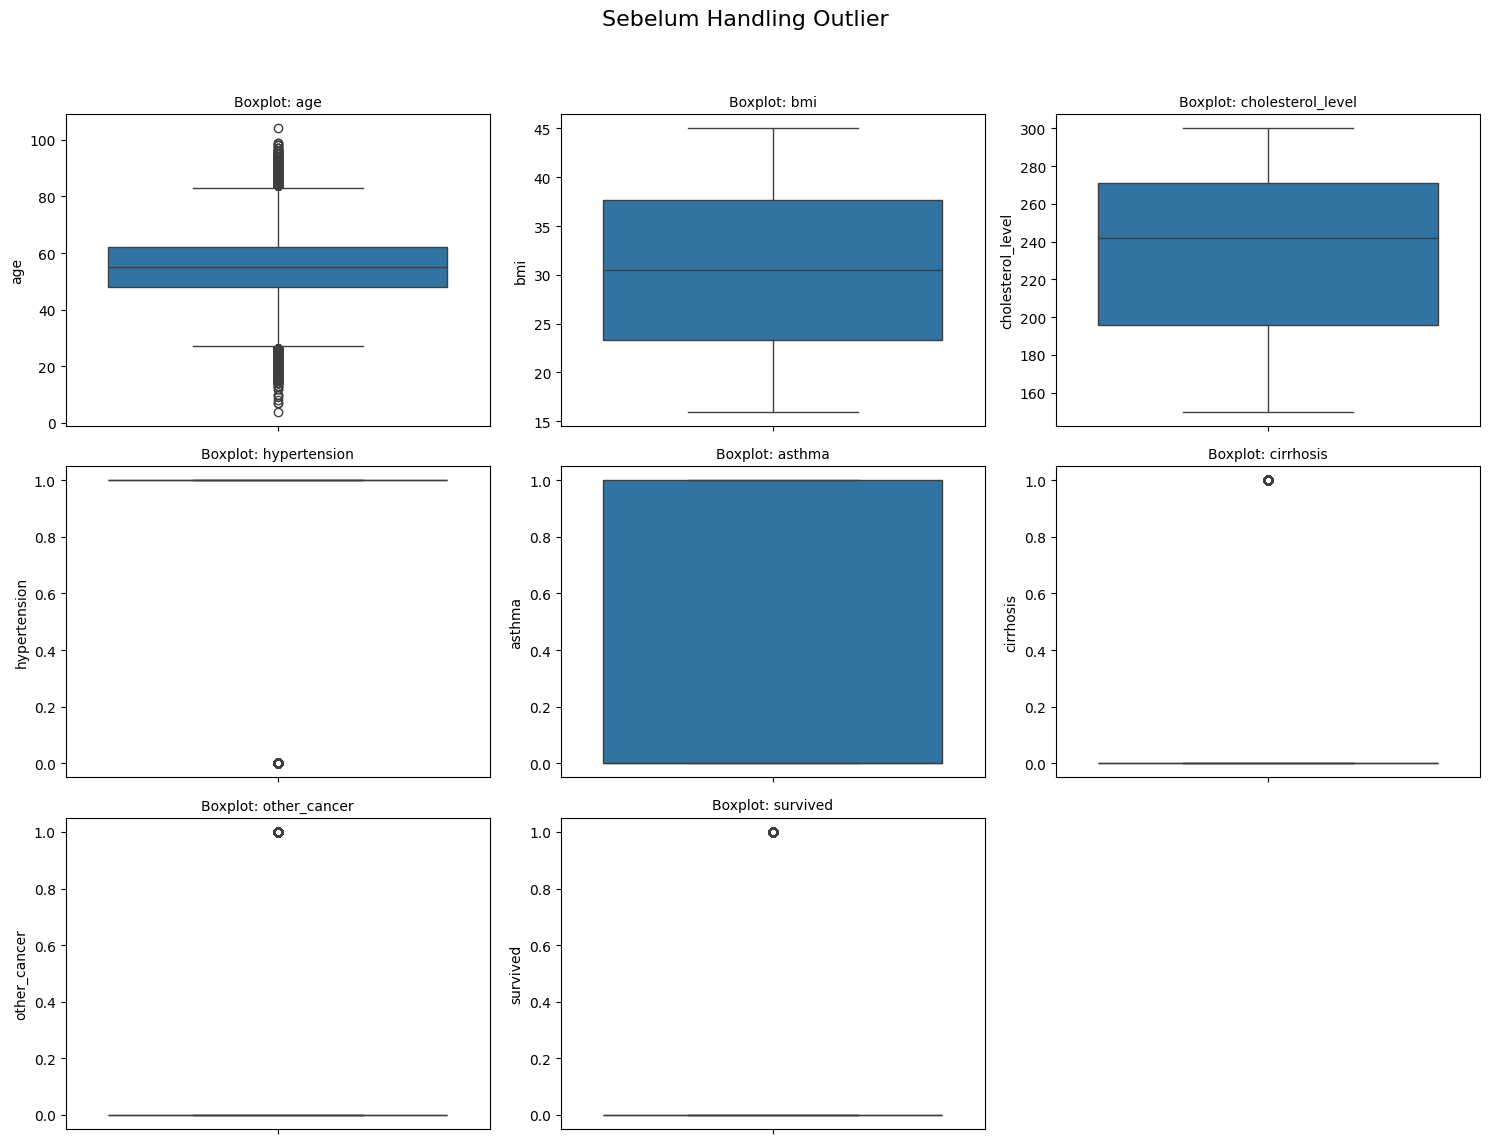

In [9]:
def boxplot_num_cols(df, num_cols, title):
  """
  Menampilkan visualisasi boxplot pada setiap fitur numerik
  """
  n_num_col = len(num_cols) # Jumlah kolom per baris
  cols = 3
  rows = math.ceil(n_num_col/cols)

  # Membuat plot
  fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
  axes = axes.flatten()

  for i, col in enumerate(num_cols):
      sns.boxplot(y=df[col], ax=axes[i])
      axes[i].set_title(f'Boxplot: {col}', fontsize=10)

  # Hapus subplot kosong jika ada
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  fig.suptitle(title, fontsize=16)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Supaya judul utama tidak ketindih
  plt.show()

before_iqr = "Sebelum Handling Outlier"
boxplot_num_cols(df, num_cols, before_iqr)

Berdasarkan visualisasi boxplot di atas, outlier terlihat jelas pada fitur `age`. Sedangkan pada fitur `hypertension`, `cirrhosis`, `other_cancer`, dan `survived` outlier yang terlihat merupakan nilai minoritas pada nilai.


In [10]:
# Handling outlier using IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

filter_outiers = ~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))
df = df[filter_outiers].reset_index(drop=True)

print('Ukuran dataset setelah handling outlier', df.shape)

Ukuran dataset setelah handling outlier (826352, 16)


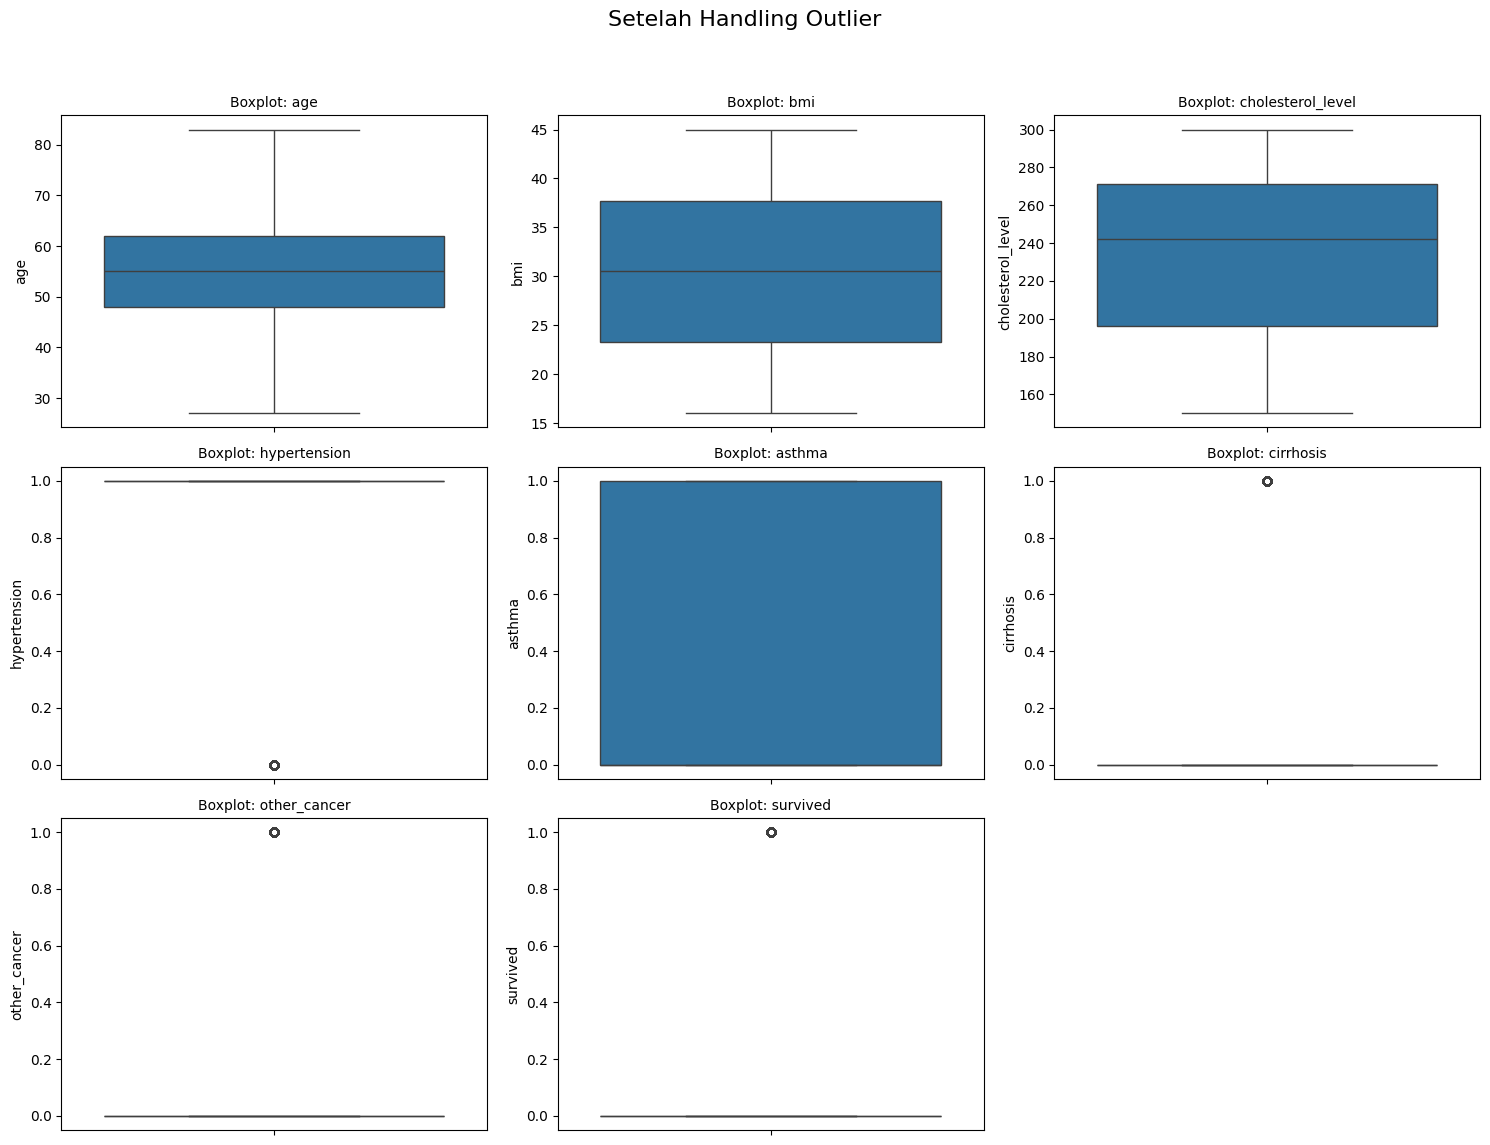

In [11]:
after_IQR = "Setelah Handling Outlier"
boxplot_num_cols(df, num_cols, after_IQR)

In [12]:
df.describe()

,age,diagnosis_date,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,end_treatment_date,survived
count,826352.000000,826352,826352.000000,826352.000000,826352.000000,826352.000000,826352.000000,826352.000000,826352,826352.000000
mean,55.007879,2019-02-01 18:55:22.891939584,30.494140,233.639398,0.750146,0.469822,0.225860,0.088287,2020-04-29 04:36:30.307277824,0.220279
min,27.000000,2014-06-02 00:00:00,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,2014-12-02 00:00:00,0.000000
25%,48.000000,2016-10-01 00:00:00,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,2018-01-02 00:00:00,0.000000
50%,55.000000,2019-01-31 00:00:00,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,2020-05-03 00:00:00,0.000000
75%,62.000000,2021-05-30 00:00:00,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,2022-08-31 00:00:00,0.000000
max,83.000000,2024-05-30 00:00:00,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,2024-12-30 00:00:00,1.000000
std,9.795605,NaN,8.367316,43.430160,0.432928,0.499089,0.418148,0.283712,NaN,0.414435


Setelah penanganan outlier dilakukan, didapatkan informasi:
1. Rata-rata umur penderita berada di rentang 48-62. Dapat disimpulkan tidak ada outlier.
2. Indeks masa tubuh atau `bmi` pasien rata-rata berada di rentang 23-38.
3. Rata-rata rentang nilai kolesterol pasien berada di rentang 196-271.
4. Akhir masa perawatan berada pada tanggal 30 Desember 2024.

### Univariate Data Analysis: Data Categorical

In [13]:
feature_names = []
unique_values_list = []

for col in cat_cols:
    unique_values = df[col].unique()
    unique_values_list.append(unique_values)
    feature_names.append(col)

df_category_unique = pd.DataFrame({'Feature': feature_names, 'Unique Values': unique_values_list})
df_category_unique

,Feature,Unique Values
0,gender,"[Male, Female]"
1,country,"[Sweden, Netherlands, Hungary, Belgium, Italy,..."
2,cancer_stage,"[Stage I, Stage III, Stage IV, Stage II]"
3,family_history,"[Yes, No]"
4,smoking_status,"[Passive Smoker, Former Smoker, Never Smoked, ..."
5,treatment_type,"[Chemotherapy, Surgery, Combined, Radiation]"



Distribusi fitur: gender
        Jumlah Sampel  Percent
gender                        
Female         413338     50.0
Male           413014     50.0


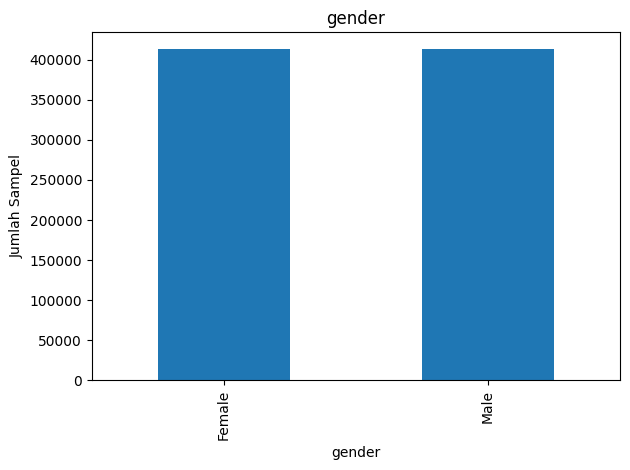


Distribusi fitur: country
                Jumlah Sampel  Percent
country                               
Malta                   30933      3.7
Ireland                 30919      3.7
Sweden                  30831      3.7
Portugal                30757      3.7
Greece                  30757      3.7
Croatia                 30724      3.7
Slovenia                30694      3.7
France                  30690      3.7
Hungary                 30681      3.7
Spain                   30679      3.7
Denmark                 30656      3.7
Belgium                 30651      3.7
Romania                 30646      3.7
Italy                   30640      3.7
Netherlands             30629      3.7
Germany                 30627      3.7
Czech Republic          30556      3.7
Estonia                 30547      3.7
Lithuania               30542      3.7
Slovakia                30540      3.7
Poland                  30530      3.7
Austria                 30485      3.7
Finland                 30433      3.

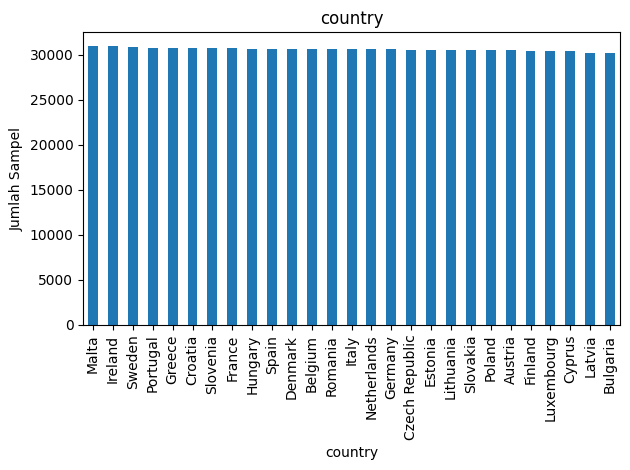


Distribusi fitur: cancer_stage
              Jumlah Sampel  Percent
cancer_stage                        
Stage IV             209814     25.4
Stage III            207809     25.1
Stage II             205457     24.9
Stage I              203272     24.6


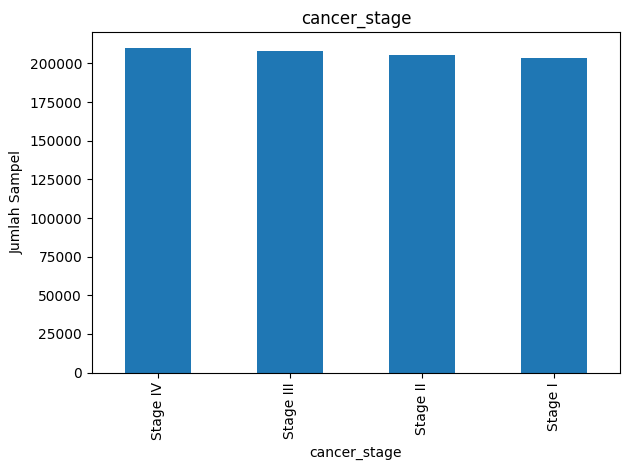


Distribusi fitur: family_history
                Jumlah Sampel  Percent
family_history                        
Yes                    413297     50.0
No                     413055     50.0


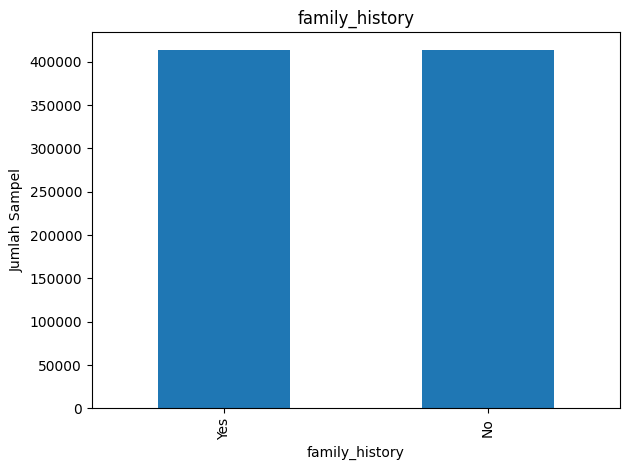


Distribusi fitur: smoking_status
                Jumlah Sampel  Percent
smoking_status                        
Passive Smoker         207204     25.1
Never Smoked           206829     25.0
Former Smoker          206458     25.0
Current Smoker         205861     24.9


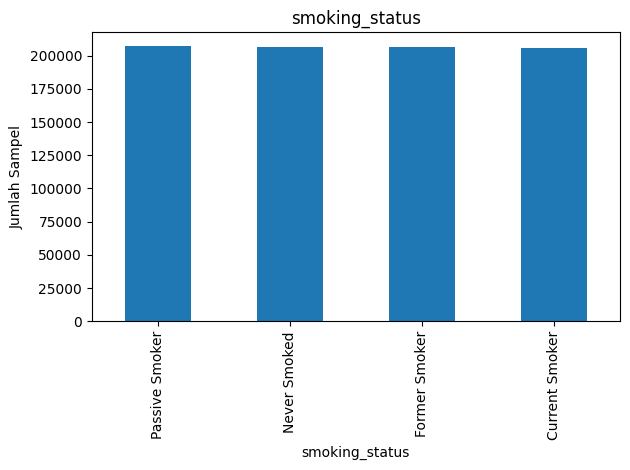


Distribusi fitur: treatment_type
                Jumlah Sampel  Percent
treatment_type                        
Surgery                207243     25.1
Chemotherapy           207131     25.1
Combined               206760     25.0
Radiation              205218     24.8


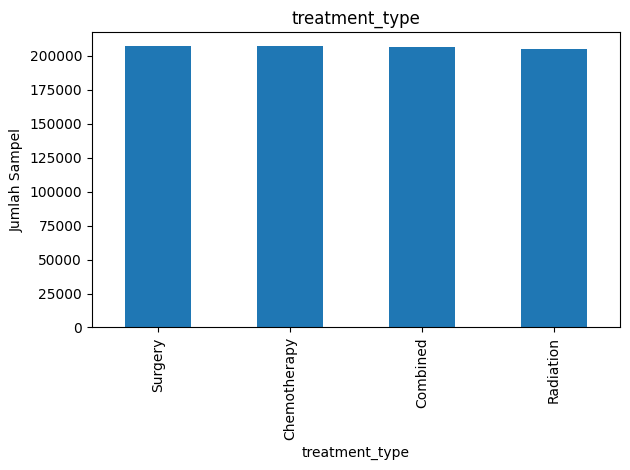

In [14]:
for col in cat_cols:
    count = df[col].value_counts()
    percent = 100 * df[col].value_counts(normalize=True)
    data = pd.DataFrame({'Jumlah Sampel': count, 'Percent': percent.round(1)})

    print(f"\nDistribusi fitur: {col}")
    print(data)

    count.plot(kind='bar', title=col)
    plt.xlabel(col)
    plt.ylabel('Jumlah Sampel')
    plt.tight_layout()
    plt.show()

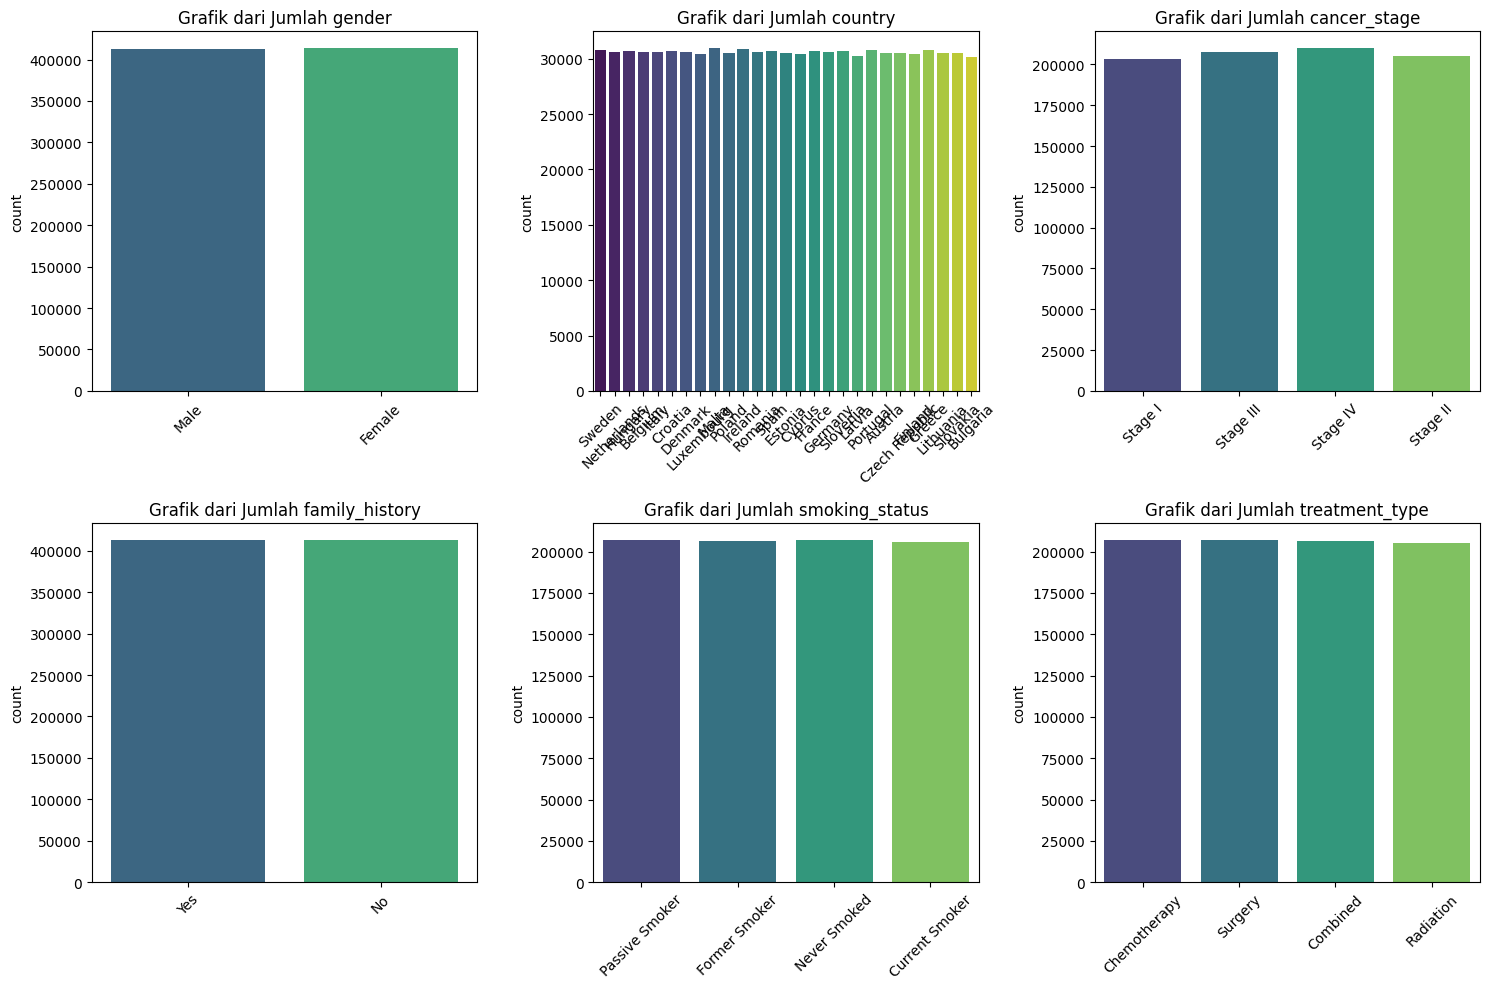

In [15]:
n = len(cat_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 5 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Grafik dari Jumlah {col}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('count')

plt.tight_layout()
plt.show()


Dari kedua visualisasi univariate di atas, dapat diketahui bahwa:
1. Semua fitur kategorikal memiliki distribusi yang seimbang pada masing-masing nilai uniknya.
2. Pada fitur `age` pasien laki-laki dan perempuan sama banyaknya.
3. Persebaran negara pada fitur `country` memiliki distribusi yang seimbang atau jumlah pada setiap nilainya sama.
4. Pada fitur `cancer_stage`, Sebagian besar pasien kanker paru-paru terdiagnosis pada Stadium IV, diikuti oleh Stadium III, Stadium II, dan paling rendah pada Stadium I.
5. Pasien dengan riwayat anggota keluarga menderita kanker paru-paru memiliki potensi sama besarnya dengan pasien yang keluarganya tidak memiliki riwayat kanker paru-paru.
6. Riwayat kanker paru-paru lebih tinggi pada perokok pasif dan paling rendah pada perokok aktif.
7. Penanganan paling banyak dilakukan pada pasien kanker paru-paru dengan operasi dan kemoterapi, sedangkan yang paling sedikit menggunakan radiasi.

### Univariate Data Exploration: Data Numeric

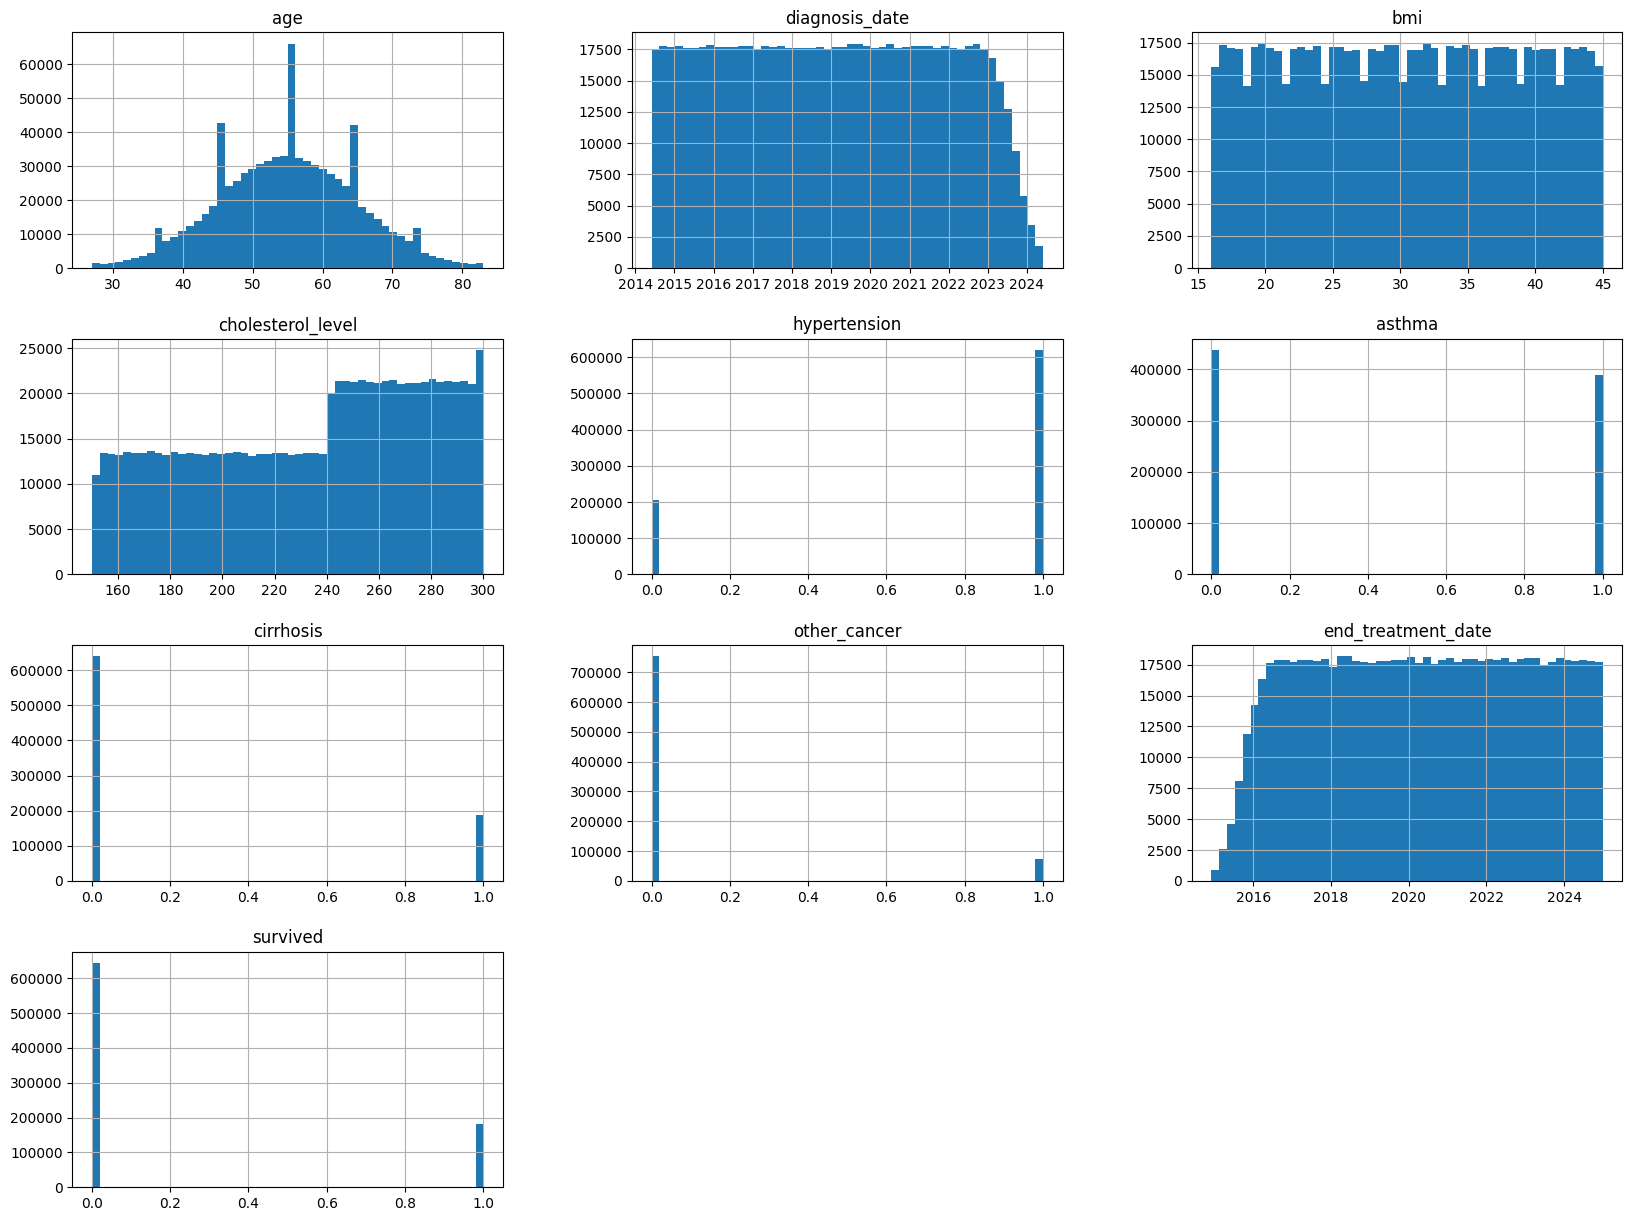

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari grafik di atas, dapat diketahui bahwa:
1. Disrtibusi pada fitur `age` merupakan distribusi normal dan menunjukkan kenaikan nilai di beberapa angka.
2. Distribusi pada fitur `diagnosis_date` menyebar dan mengalami penurunan pasien setelah tahun 2022. Bisa dikatakan persebaran sedikit miring ke kiri atau left-skewd.
3. Persebaran pada fitur `bmi` distribusinya merata diantara 18-45 dan menunjukkan variasi yang luas.
4. Pada fitur `colesterol_level` distribusi memiliki dua puncak atau bimodal setelah nilai sekitar 240. Bisa dikategorikan terdapat kelompok dengan risiko kolesterol tinggi.
5. Pada fitur `end_treatment_date` distribusinya mirip `diagnosis_date`, pasien mengalami kenaikan nilai setelah tahun 2015.
5. Pada fitur `hypertension`, `asthma`, `cirrhosis`, `other_cancer` dan `survived` merupakan variabel biner dengan nilai 0 (tidak memiliki kondisi tersebut) dan 1 (memiliki kondisi tersebut). Dapat disimpulkan bahwa:
- `hypertension`, lebih banyak pasien dengan kondisi tekanan darah tinggi (nilai 1 paling tinggi).
- `asthma`, sebagian besar pasien tidak memiliki penyakit asma.
- `cirrhosis`, hanya sebagian kecil pasien memiliki kondisi ini.
- `other_cancer`, hanya sebagian kecil pasien memiliki kondisi ini.
- `survived`, mayoritas pasien tidak bertahan hidup (nilai 0 paling tinggi).

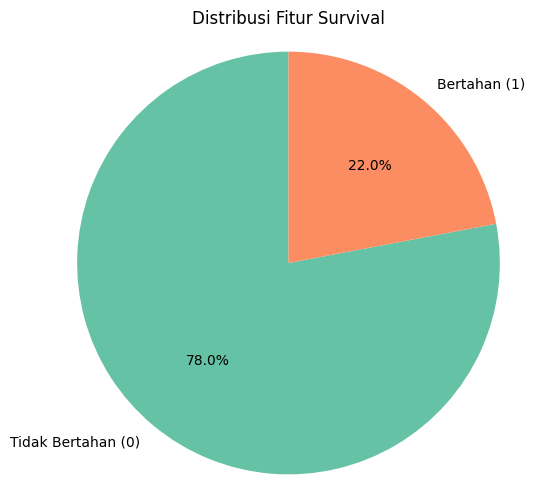

In [17]:
survival_counts = df['survived'].value_counts().sort_index()

# Label bisa disesuaikan kalau ingin lebih informatif
labels = ['Tidak Bertahan (0)', 'Bertahan (1)']

# Pie chart
plt.figure(figsize=(6, 6))
# colors = plt.cm.viridis(np.linspace(0, 1, len(survival_counts)))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribusi Fitur Survival')
plt.axis('equal')
plt.show()

### Multivariate Data

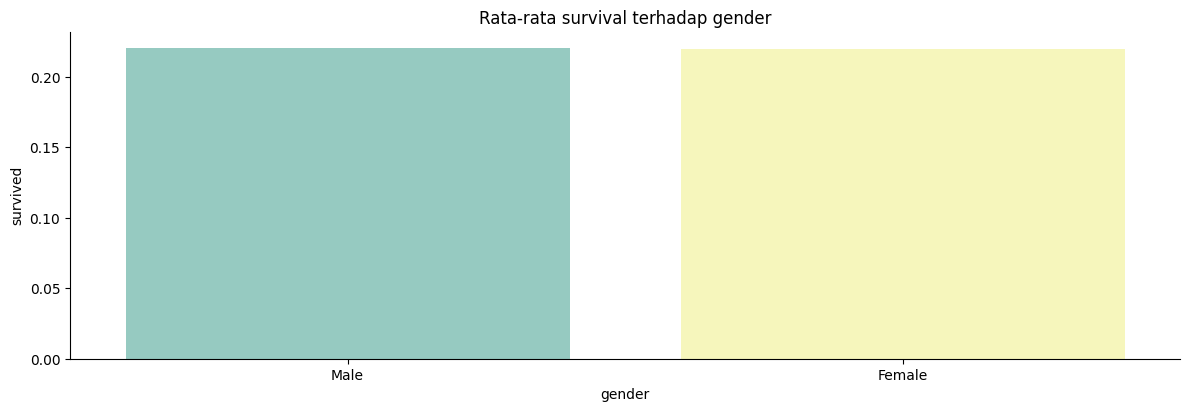

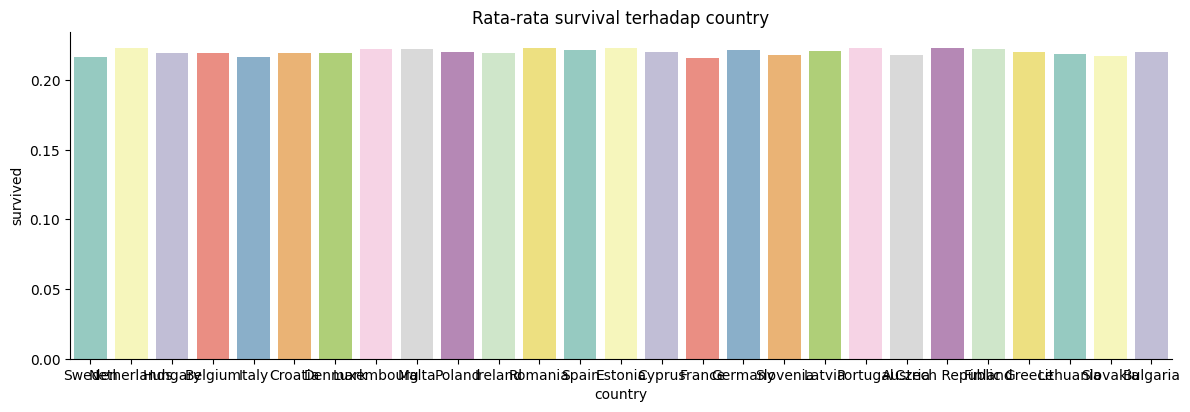

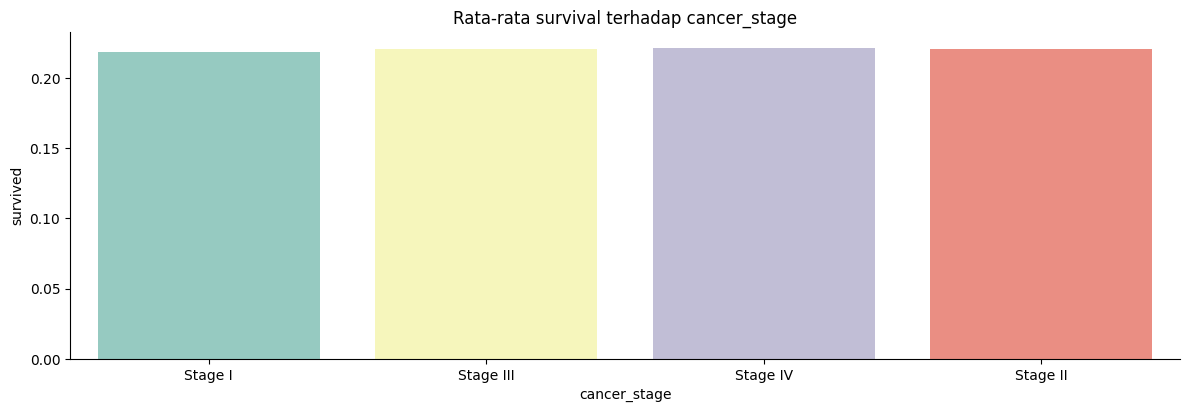

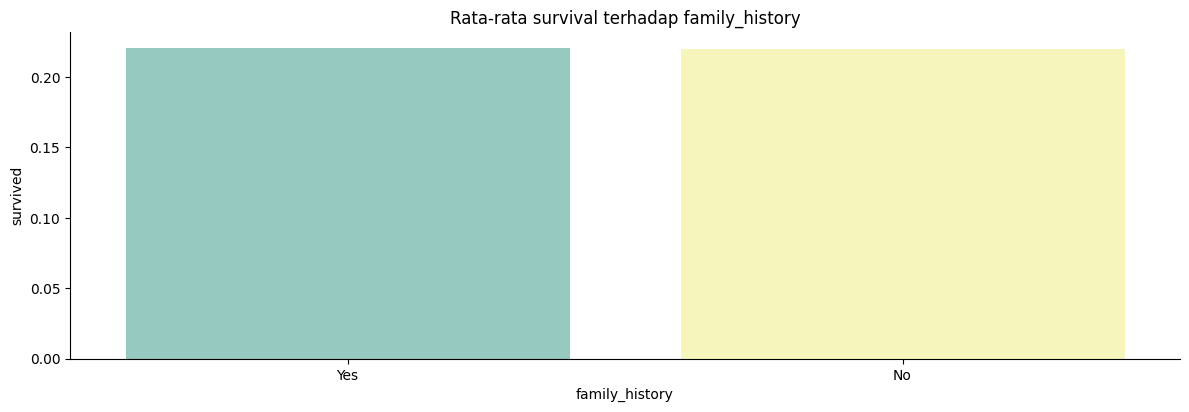

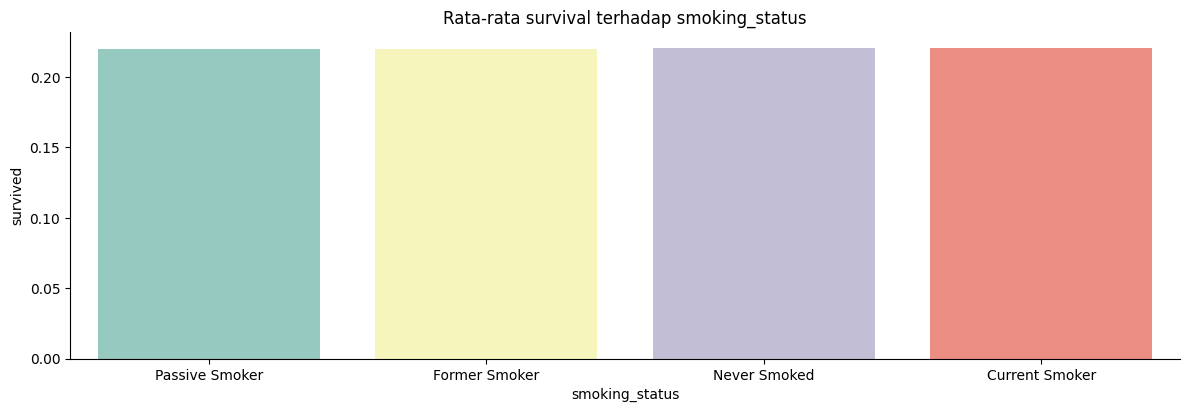

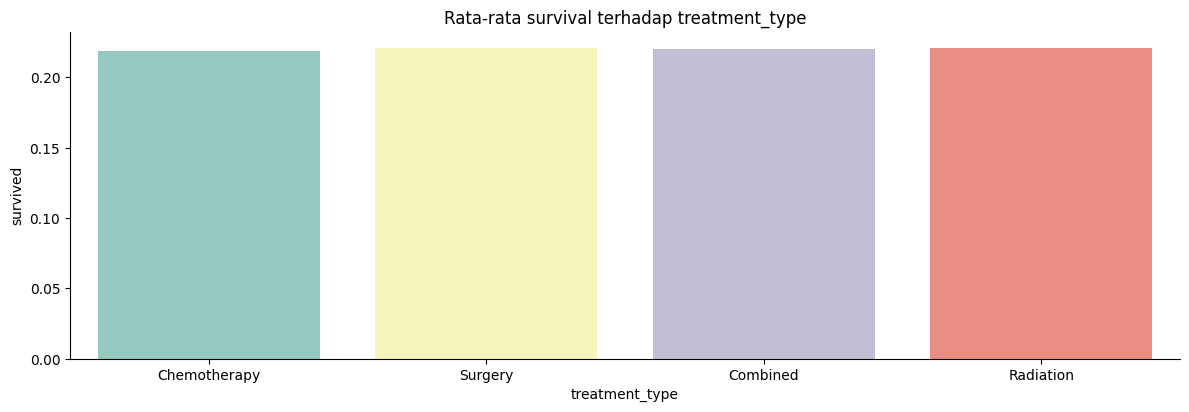

In [18]:
cat_features = cat_cols.to_list()
for col in cat_features:
    sns.catplot(x=col, y='survived', data=df, kind="bar", hue=col, legend=False, errorbar=None,
                dodge=False, height=4, aspect=3, palette="Set3")
    plt.title(f"Rata-rata survival terhadap {col}")
    plt.show()

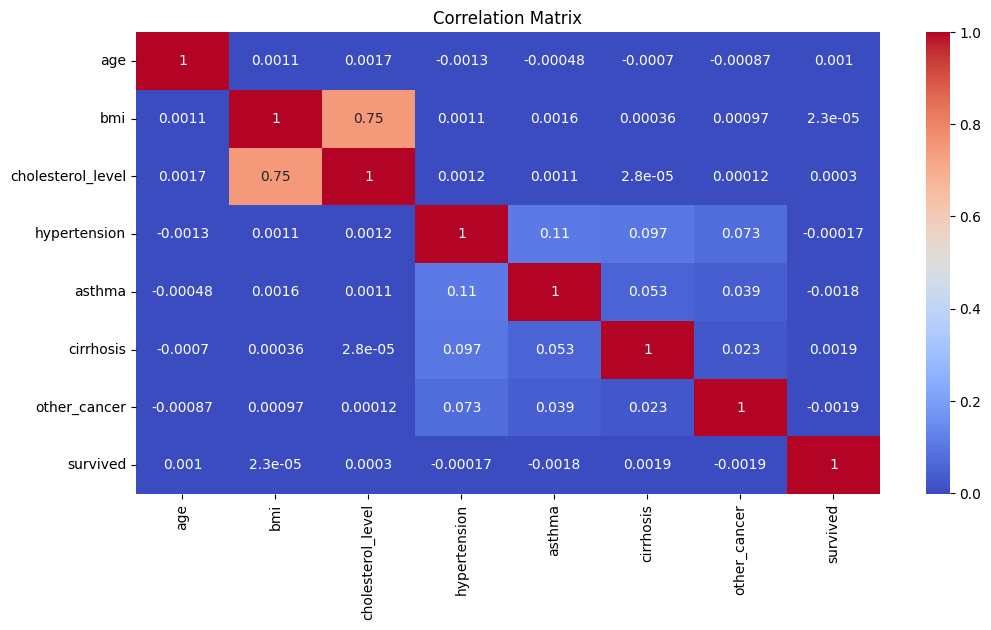

In [19]:
# Correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari matriks korelasi di atas, diketahui bahwa hubungan atau korelasi yang tinggi terdapat pada fitur `colestreol_level` dengan `bmi` dengan nilai 0,75.

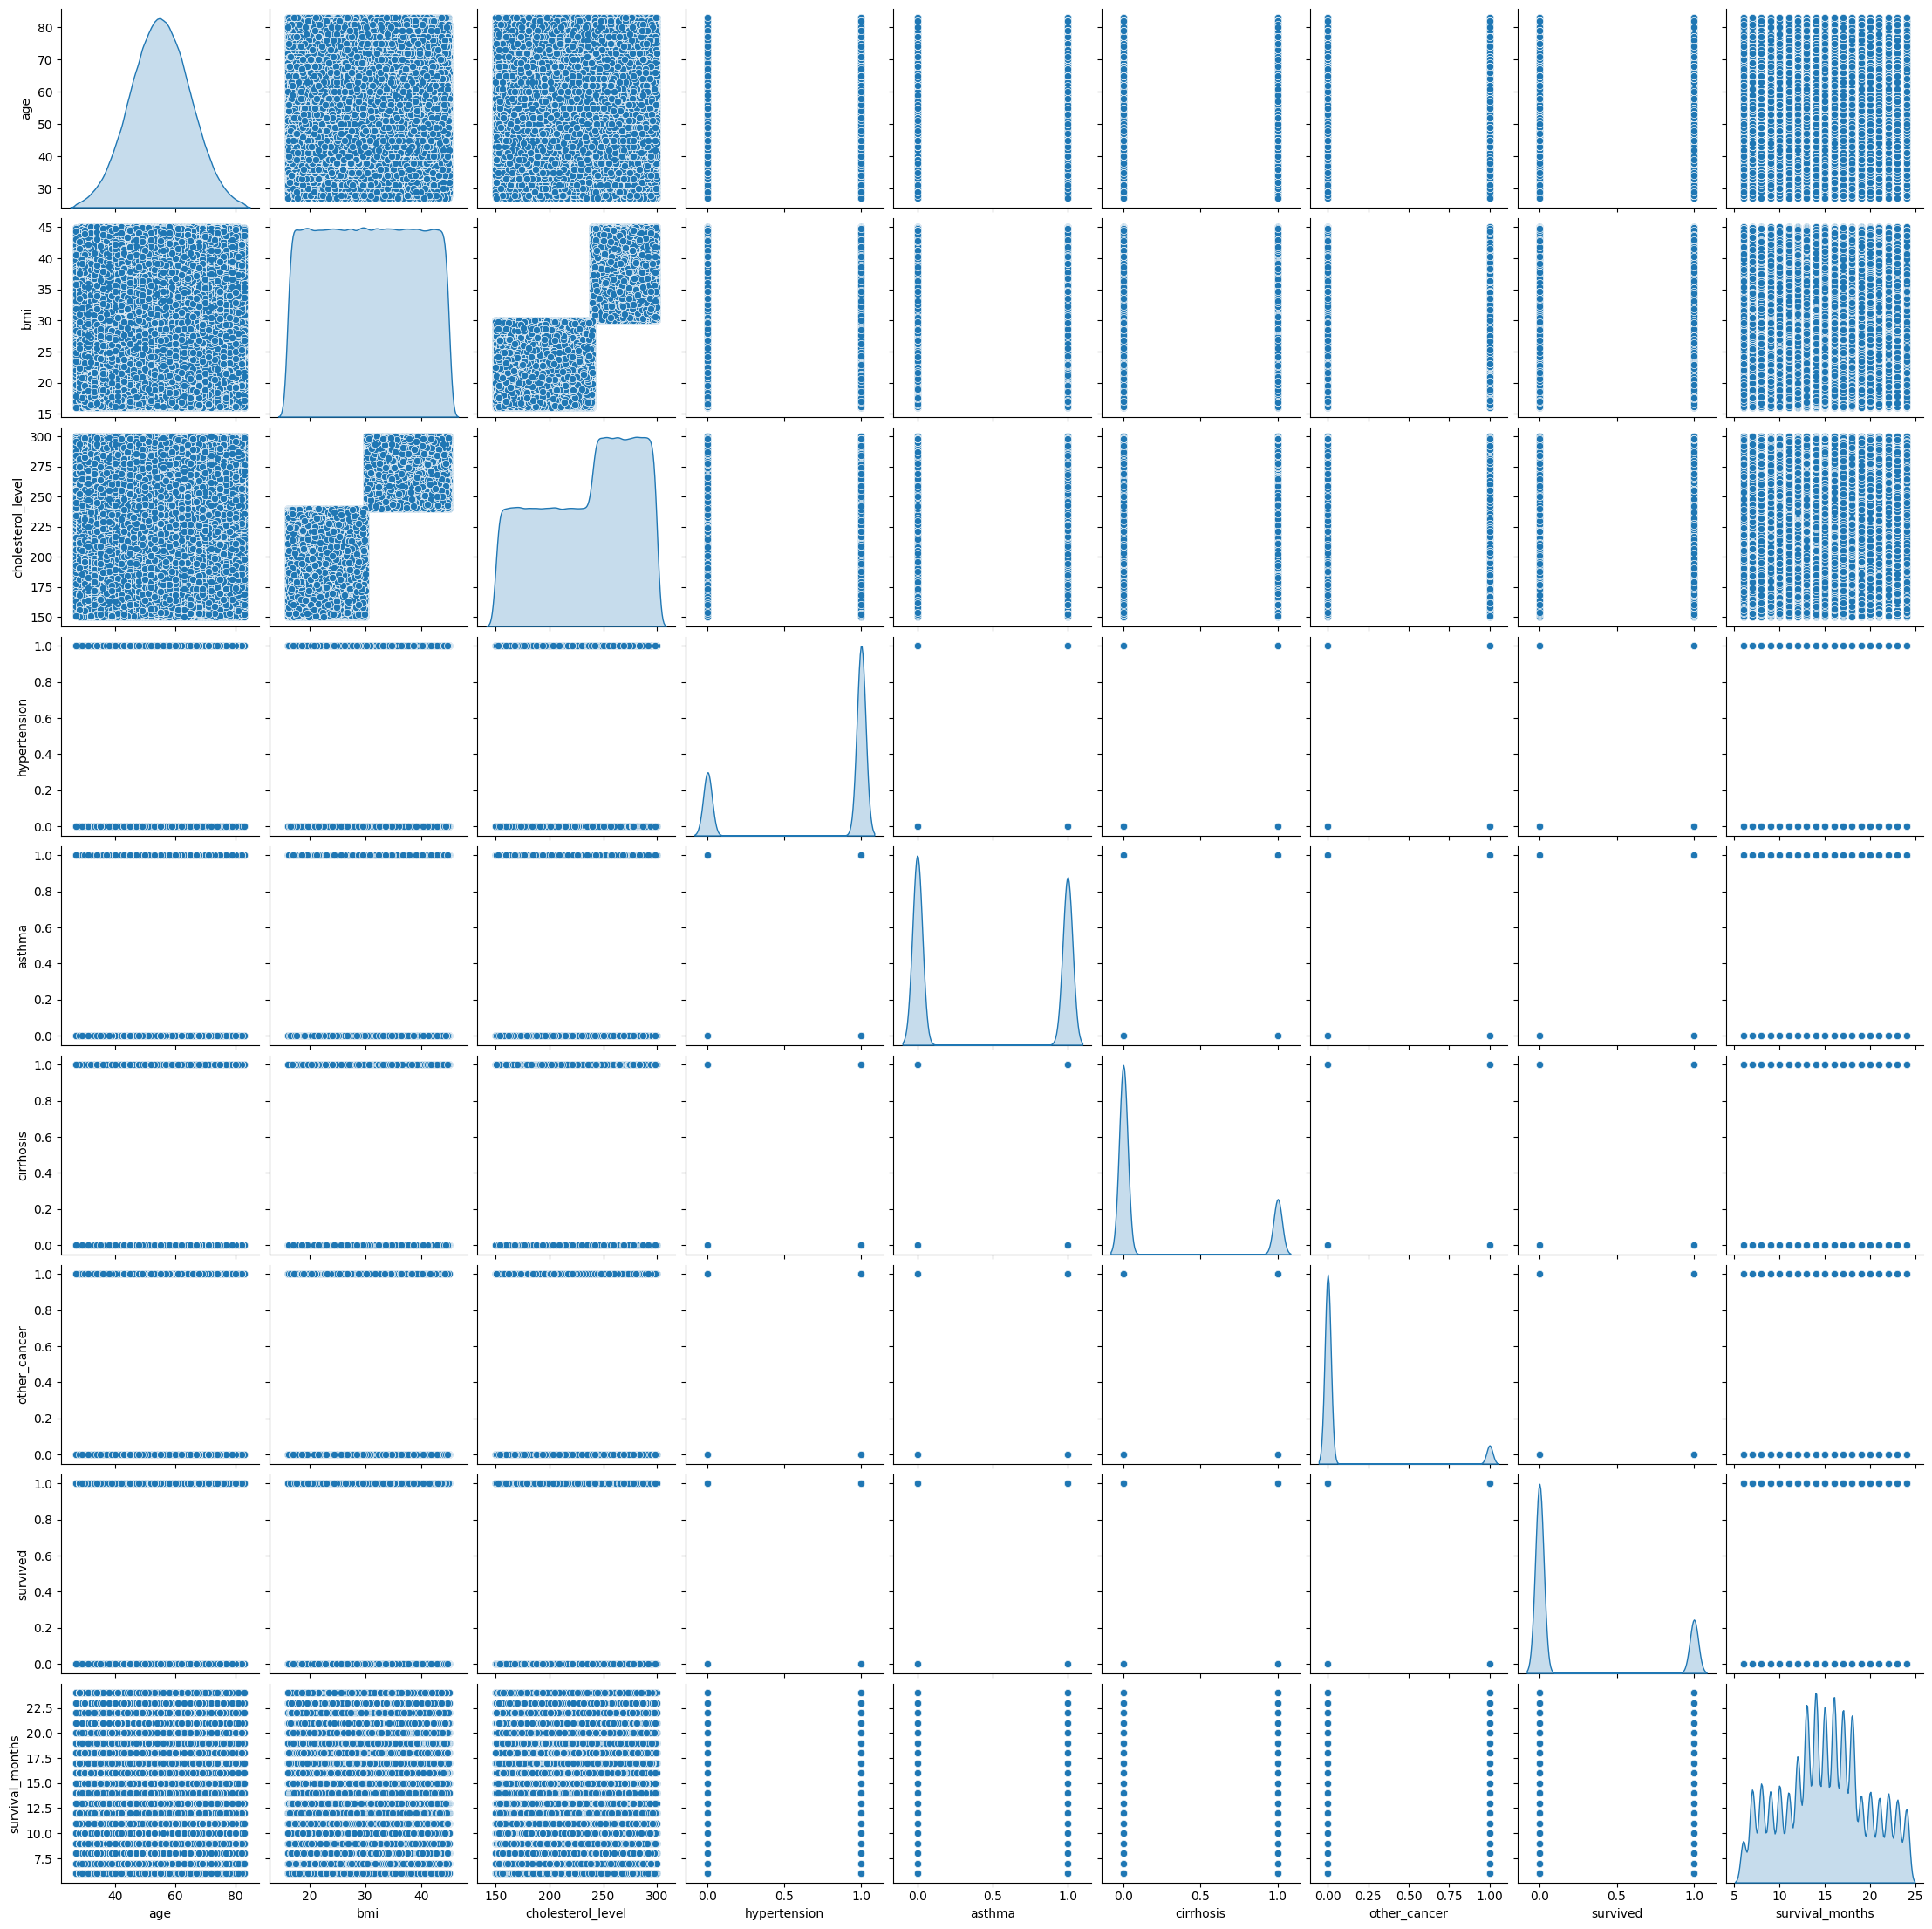

In [36]:
# Mengamati hubungan pada fitur numerik
sns.pairplot(df, diag_kind='kde')

Fungsi pairplot di atas menjukkan relasi pasangan dalam dataset. Diketahui bahwa:
1. Distribusi pada fitur `age` merupakan distribusi normal.
2. Korelasi fitur `colesterol_level` dengan `bmi` menunjukkan miring ke kanan atau right-skewd menunjukkan bahwa korelasi yang positif terjadi di antara kedua fitur tersebut.
3. Selain dari dari ketiga fitur di atas, merupakan fitur kategorikal yang diubah menjadi numerik sehingga korelasinya merupakan garis lurus.
4. Dapat dipastikan, karakteristik dataset merupakan non-linear dan tersebar.

## 4. Data Preparation
### Feature Engineering
Menambahkan beberapa fitur yang mungkin relevan agar model dapat memberikan klasifikasi dengan performa yang baik. Nerikut fitur yang akan ditambahkan:
1. `survival_months`, merupakan selisih dari `diagnosis_date` dengan `end_treatment_date` yang disajikan dalam bentuk bulan.
2. `survival_group`, hasil binning dari `survival_months` yang disajikan dalam bentuk interval 2 tahun.
3. `age_group`, hasil binning dari `age` dengan membagi menjadi rentang puluhan, misalnya usia 20an, 30an, dan seterusnya.
4. `cholesterol_group`, hasil binning dari `cholesterol_level` yang dibagi menjadi Normal jika di bawah angka 200 dan High jika kadar kolesterol di atas 200.
5. `bmi_group`, hasil binning dari `bmi` yang dibagi menjadi Underweight (<18), Normal (18,5-24,9), dan Overwight (>25).

In [21]:
# Feature engineering dengan teknik bining pada fitur age, cholesterol_level, dan bmi

bins_age = [20, 30, 40, 50, 60, 70, 80, 90]
labels_age = ['20an', '30an', '40an', '50an', '60an', '70an', '80an']

bins_survival = [0, 24, 48, 72, 96, 120, 144]
survival_labels = ['0-2 Years', '2-4 Years', '4-6 Years', '6-8 Years', '8-10 Years', '10-12 Years']
duration_of_treatment = df['end_treatment_date'] - df['diagnosis_date']

bins_colesterol = [0, 200, 300]
labels_colesterol = ['Normal', 'High']

bins_bmi = [0, 18.5, 24.9, 50]
labels_bmi = ['Underweight', 'Normal', 'Overweight']

df['survival_months'] = round(duration_of_treatment.dt.days / 30)
df['survival_group'] = pd.cut(df['survival_months'], bins=bins_survival, labels=survival_labels, right=False)
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)
df['cholesterol_group'] = pd.cut(df['cholesterol_level'], bins=bins_colesterol, labels=labels_colesterol, right=False)
df['bmi_group'] = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)

df

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,...,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,survival_months,survival_group,age_group,cholesterol_group,bmi_group
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,...,1,0,Chemotherapy,2017-09-10,0,17.0,0-2 Years,60an,Normal,Overweight
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,...,0,0,Surgery,2024-06-17,1,14.0,0-2 Years,50an,High,Overweight
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,...,0,0,Combined,2024-04-09,0,12.0,0-2 Years,60an,High,Overweight
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,...,0,0,Chemotherapy,2017-04-23,0,15.0,0-2 Years,50an,High,Overweight
4,50.0,Male,Italy,2023-01-02,Stage I,No,Never Smoked,37.6,274,1,...,0,0,Radiation,2024-12-27,0,24.0,2-4 Years,50an,High,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826347,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,...,1,0,Radiation,2023-02-23,0,8.0,0-2 Years,40an,High,Overweight
826348,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,...,0,0,Surgery,2017-06-19,0,21.0,0-2 Years,60an,High,Normal
826349,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,...,0,0,Combined,2017-01-23,1,10.0,0-2 Years,40an,High,Overweight
826350,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,...,0,0,Chemotherapy,2017-12-12,0,24.0,2-4 Years,60an,Normal,Normal


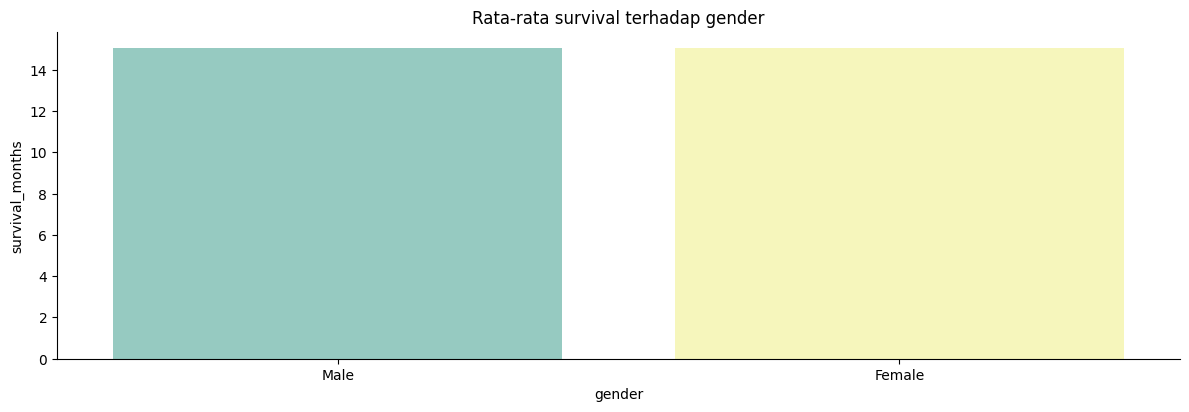

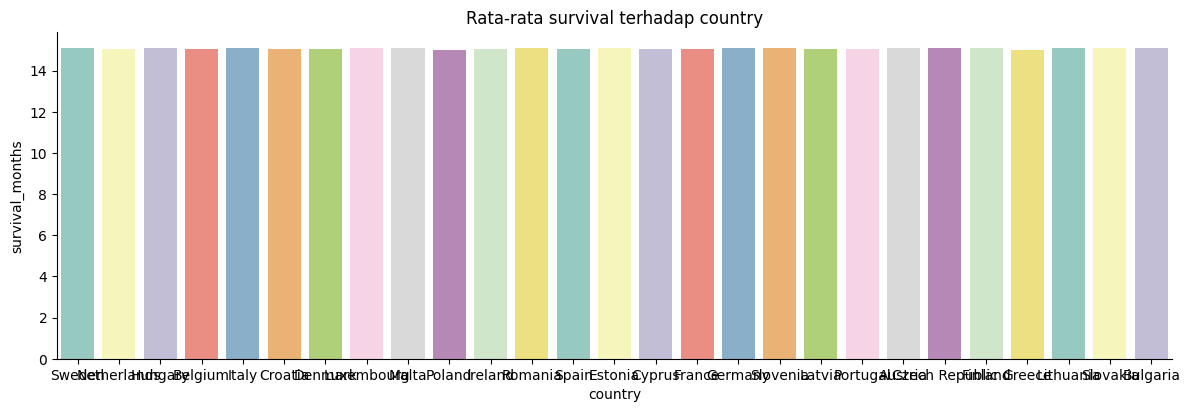

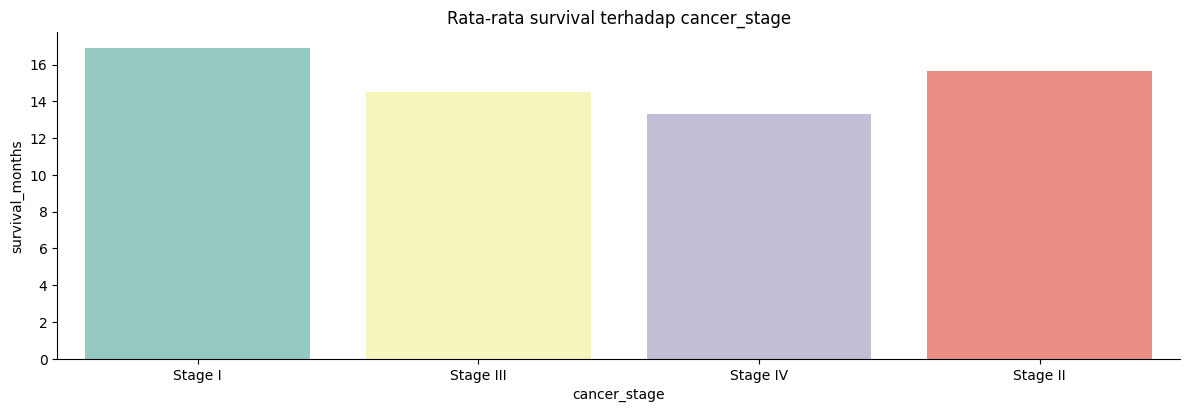

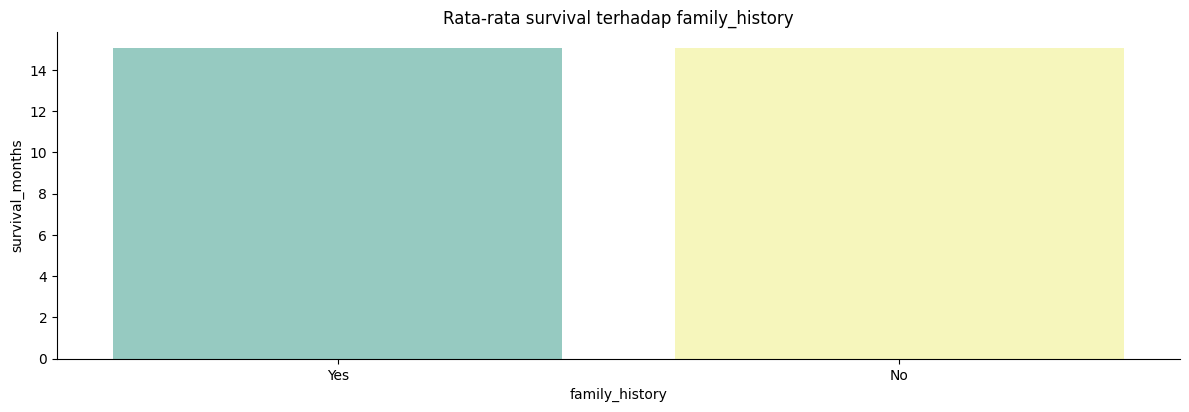

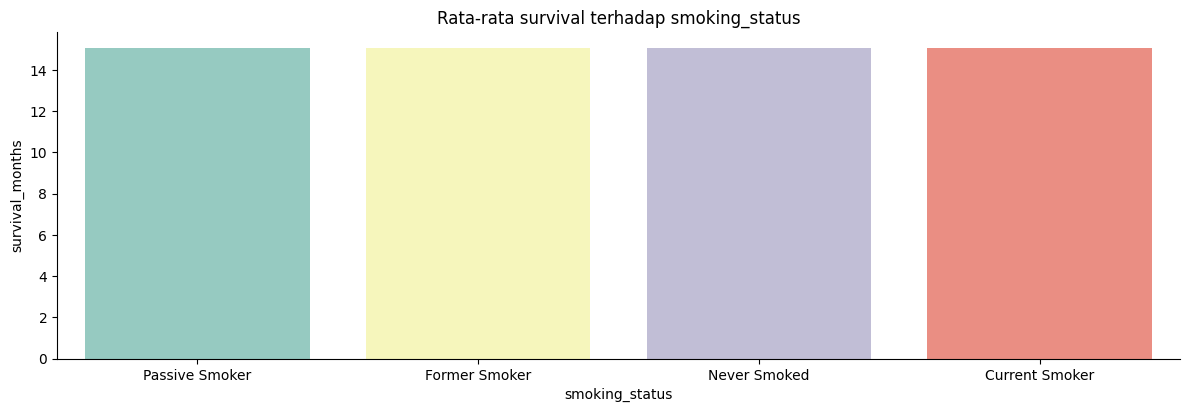

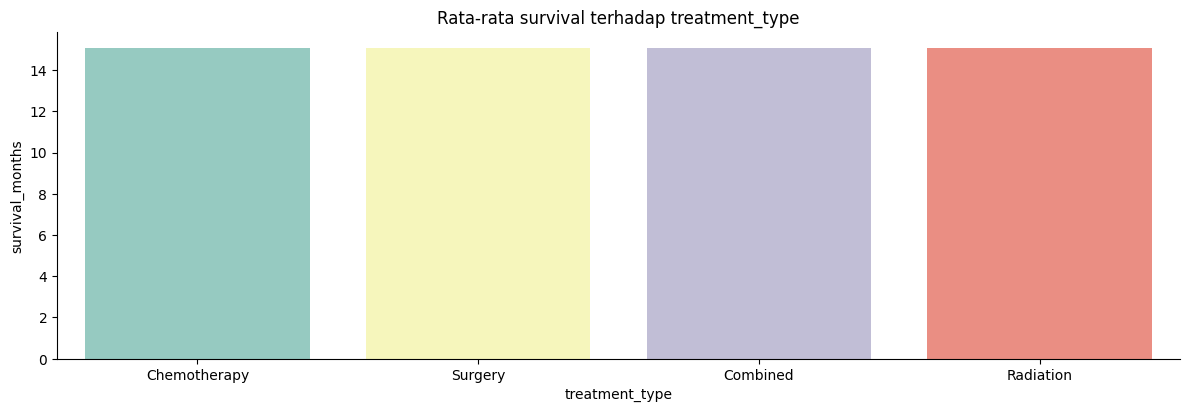

In [22]:
cat_features = cat_cols.to_list()
for col in cat_features:
    sns.catplot(x=col, y='survival_months', data=df, kind="bar", hue=col, legend=False, errorbar=None,
                dodge=False, height=4, aspect=3, palette="Set3")
    plt.title(f"Rata-rata survival terhadap {col}")
    plt.show()

Setelah melakukan feature engineering, hampir semua fitur kategori terhadap `survival_months` memiliki distribusi yang sama, kecuali pada fitur `cancer_stage`. Semakin rendah stadium pada pasien, maka perawatannya lebih lama. Hal ini memberikan interpretasi bahwa kanker dengan stadium semakin tinggi, semakin kecil harapan untuk selamat sesuai dengan distribusi pada fitur `survival`.

### Split Data
Pembagian dataset dilakukan menjadi 70% dataset pelatihan atau training dan 30% dataset merupakan data uji atau training. Pemisahan dataset ini mengecualikan fitur `diagnosis_date` dan `end_treatment_date` karena sudah diwakilkan oleh `survival_months` dan `survival_group`. Sedangkan target yang digunakan adalah `survived`.

In [23]:
# Split dataset dan menjadikan cancer_stage menjadi target

X = df.drop(columns=['survived', 'diagnosis_date', 'end_treatment_date'])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Label Encoding
Mengubah nilai data kategorikal menjadi representasi numerik dilakukan agar komputer dapat lebih mudah mengenali fitur tersebut. Proses label encoding dilakukan secara manual pada fitur supaya lebih mudah dipantau. Proses ini dilakukan setelah proses spliting dataset (splitting) dilakukan untuk mencegah terjadinya kebocoran data (data leakage) pada model.

In [24]:
# Kembali menginisiasi kolom dengan tipe numerikal untuk standar scaler dan objek untuk label encoder
num_cols = ['age', 'bmi', 'cholesterol_level', 'survival_months']
cat_cols = ['gender', 'cancer_stage','survival_group', 'country', 'family_history', 'smoking_status', 'treatment_type', 'age_group', 'cholesterol_group', 'bmi_group']

In [25]:
def labelEncoding(df,columns):
  for col in columns:
    mapping = {val: i for i, val in enumerate(df[col].unique(), 1)}
    df[col] = df[col].map(mapping)
  return df[columns]

X_train[cat_cols] = labelEncoding(X_train,cat_cols)
X_test[cat_cols] = labelEncoding(X_test,cat_cols)

# Menampilkan data train dan test
print(f"Training Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Shape: {X_test.shape}, {y_test.shape}")

Training Shape: (743716, 18), (743716,)
Test Shape: (82636, 18), (82636,)


### Normalisasi
Normalisasi data dilakukan mennggunakan standard scaler pada fitur numerik terutama bagi data yang memiliki selisih yang tinggi. Nilai numerik yang dilakukan normalisasi, yaitu `age`, `bmi`, `cholesterol_level`, dan `survival_months`.

In [26]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Feature Selection

Tidak semua fitur akan digunakan pada proses pembangunan model, mengingat terdapat 18 fitur pada data. Maka akan dilakukan seleksi fitur menggunakan teknik Lasso dan mempertimbangkan matriks korelasi (correlation matrix).

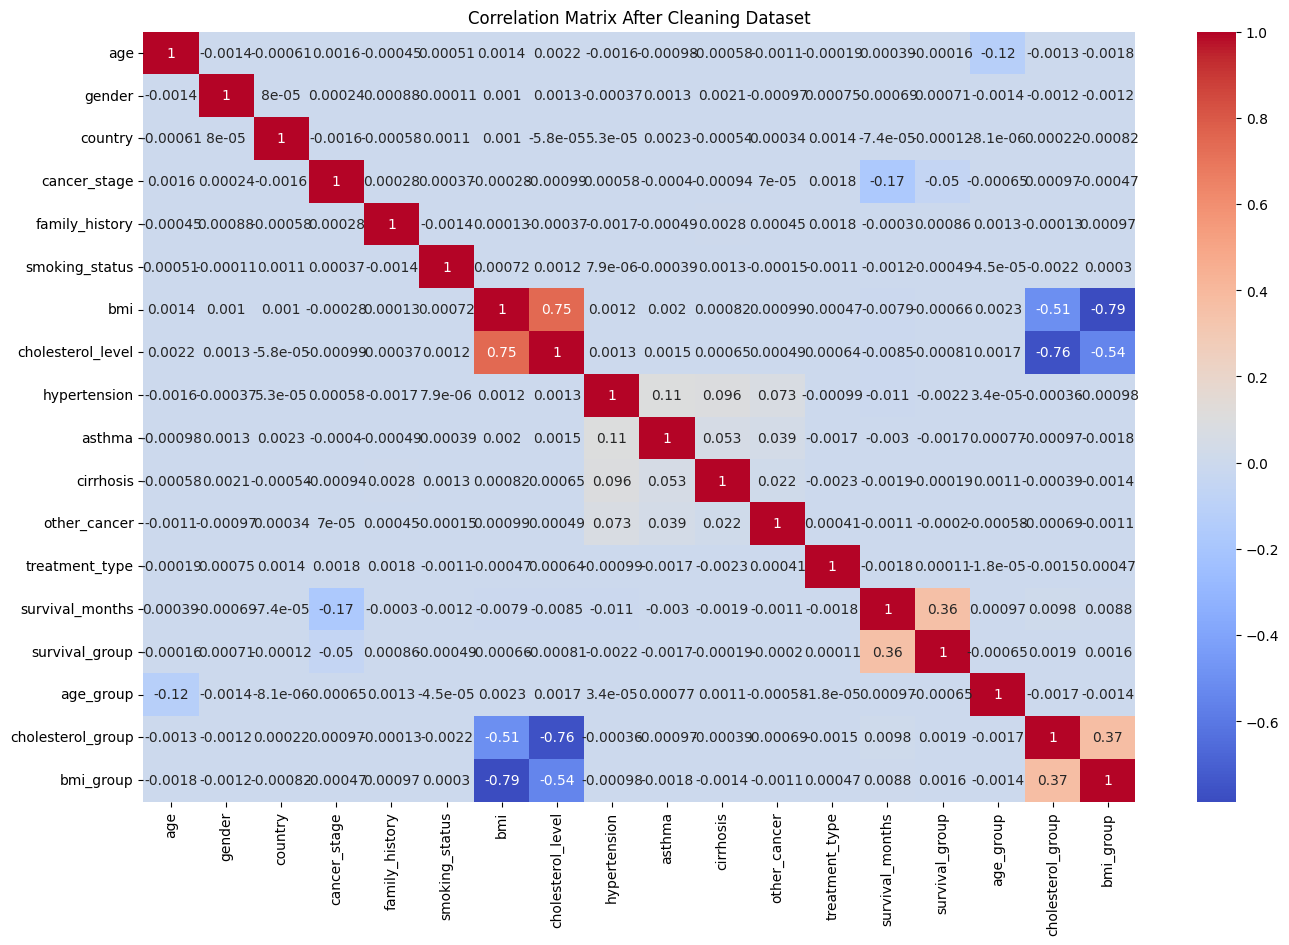

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Cleaning Dataset')
plt.show()

Dari korelasi matriks di atas, terdapat beberapa fitur yang saling berkorelasi dengan nilai yang cukup tinggi, yaitu:
1. Fitur `age` dengan `age_group` memiliki korelasi negatif.
2. `bmi`, `bmi_group`, `cholesterol_level`, dan `colesterol_group` memiliki korelasi dengan nilai yang cukup signifikan dan dapat mempengaruhi model.
3. `survival_month` dan `survival_group` memiliki korelasi yang positif.
4. Maka dari itu, ke delapan fitur tersebut dapat dijadikan bahan pertimbangan untuk dimasukkan ke dalam model.

Banyaknya jumlah fitur, distribusi yang hampir merata pada sebagian besar fitur, serta korelasi antar fitur yang rendah dapat menyebabkan model membuat prediksi yang terlalu umum (general). Oleh karena itu, dilakukan proses pemilihan fitur (feature selection) untuk meningkatkan kinerja model menggunakan teknik Lasso.

**Teknik Lasso** (Least Absolute Shrinkage and Selection Operator) merupakan salah satu teknik regresi dalam statistika dan machine learning untuk pilihan fitur. Lasso menambahkan penalti berupa nilai absolut ke dalam fungsi loss, yang disebut dengan L1 regularization. Bekerja dengan membuat beberapa koefisien regresi menjadi nol sehingga fitur yang tidak penting dihilangkan dari model.

Kelebihan dari Lasso:
1. Dapat melakukan seleksi fitur pada model.
2. Membantu menangani overfitting.
3. Cocok untuk dataset dengan banyak fitur, terutama jika beberapa fitur tidak penting digunakan.

In [28]:
# Pakai Lasso untuk mengecilkan koefisien fitur tidak penting ke nol
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# Lihat fitur yang dipilih
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['country'], dtype='object')


In [29]:
selected_features_cols = selected_features.tolist() + ['survival_months', 'bmi', 'cholesterol_group']

# Mengambil data X train dan test yang sudah dipisahkan sebelumnya.
X_train_selected = X_train[selected_features_cols]
X_test_selected = X_test[selected_features_cols]

# Menampilkan data train dan test
print(f"Training Shape: {X_train_selected.shape}, {y_train.shape}")
print(f"Test Shape: {X_test_selected.shape}, {y_test.shape}")

Training Shape: (743716, 4), (743716,)
Test Shape: (82636, 4), (82636,)


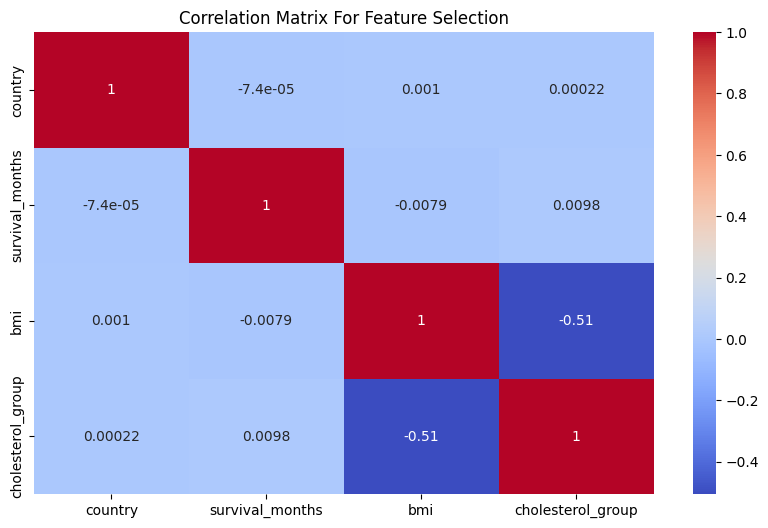

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix For Feature Selection')
plt.show()

Diputuskan, total 6 fitur yang akan digunakan dalam proses pembangunan model ini. Fitur-fitur yang dipilih, yaitu `country`, `cancer_stage`, `age_group`, `survival_months`, `bmi`, dan `cholesterol_group`.

##5. Building Model

Berdasarkan karakteristik data yang tidak linear serta jumlah data yang besar, dibutuhkan model dan algoritma yang cukup kompleks dan mampu menangani data dalam jumlah besar. Oleh karena itu, dilakukan percobaan menggunakan empat model berikut:
1. **Decision Tree**, merupakan model yang sederhana namun cukup efektif pada data yang banyak baik pada fitur kategorikal, maupun numerikal. Interpretasi yang diberikan jelas terhadap proses pengambilan keputusan.
<br>**Kelebihan**
- Mudah dipahami dan dijelaskan melalui visualisasi pohon keputusan.
- Dapat menangani data numerik dan kategorikal.
- Tidak mewajibkan normalisasi data.
- Cepat untuk dataset kecil dan menengah.
<br>**Kekurangan**
- Rentan terhadap overfitting jika tidak dipangkas (purning).
- Sensitif terhadap perubahan kecil dalam data.
- Kurang stabil pada data yang kompleks.

2. **Random Forest**, merupakan pengembangan dari model Decision Tree dengan teknik ensemble learning dalam membentuk banyak pohon keputusan untuk meningkatkan akurasi dan meminimalkan overfitting.
<br>**Kelebihan**
- Lebih akurat daripada satu pohon atau decision tree.
- Mampu mengurangi overfitting melalui teknik ensemble (bagging).
- Dapat menangani data yang besar dan kompleks.
- Memberikan estimasi feature importance.
<br>**Kekurangan**
- Kurang interpretatif karena terdiri dari beberapa pohon.
- Waktu pelatiahan lebih lama dibandingkan dengan decision tree.
- Bisa menjadi lebih lambat pada saat prediksi pada dataset yang besar.

3. **K-Nearest Neighbor**, merupakan algoritma klasifikasn dengan memanfaatkan data terdekat untuk melakukan prediksi pada data baru yang belum dikenal (data testing). Cocok digunakan untuk jenis data kategorikal maupun numerikal.
<br>Kelebihan:
- Sederhana dan intuitif.
- Tidak memerlukan pelatihan yang berlebihan (*lazy learner*).
- Cocok untuk data dengan struktur non-linear.
- Performa baik pada dataset kecil dan bersih.
<br>Kekurangan:
- Sensitif terhadap skala dan perlu dilakukan normalisasi.
- Tidak efektif pada dataset yang besar, akan lambat pada proses prediksi.
- Rentan terhadap noise dan outlier.
- Tidak memberikan interpretasi yang jelas.

4. **XGBoost**, merupakan kependekan dari Extreme Gradient Boosting adalah versi lanjutan dari Gradient Boosting yang dioptimalkan untuk efisiensi dan performa tinggi dan cocok untuk dataset besar.
- Performa tinggi dan akurat bagi proses klasifikasi.
- Dapat menangani missing value secara otomatis.
- Mendukung regularisasi (L1 dan L2) untuk menghindari overfitting.
- Cepat karena mendukung paralelisasi.
<br>**Kekurangan**
- Kompleks dalam tunung parameter.
- Waktu pelatiahan relatif lama dibandingkan model sederhana.
- Interpretasi model lebih sulit dibandingkan dengan pohon tunggal.



In [31]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train_selected, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train_selected, y_train)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_model.fit(X_train_selected, y_train)

# XGBoost
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train_selected, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

## 6. Evaluasi Model


Decission Tree Accuracy: 0.7796
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     64445
           1       0.24      0.00      0.00     18191

    accuracy                           0.78     82636
   macro avg       0.51      0.50      0.44     82636
weighted avg       0.66      0.78      0.68     82636



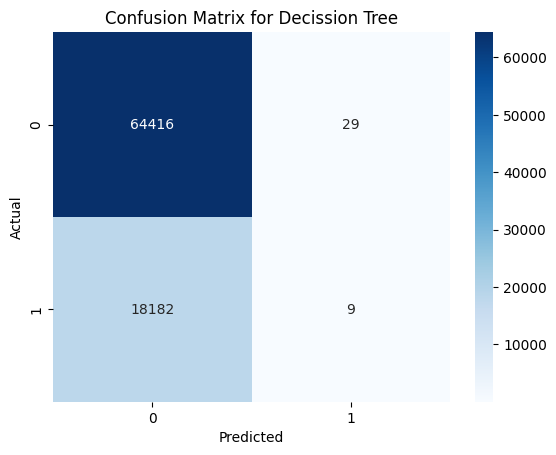


Random Forest Accuracy: 0.7199
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83     64445
           1       0.21      0.10      0.14     18191

    accuracy                           0.72     82636
   macro avg       0.50      0.50      0.48     82636
weighted avg       0.65      0.72      0.68     82636



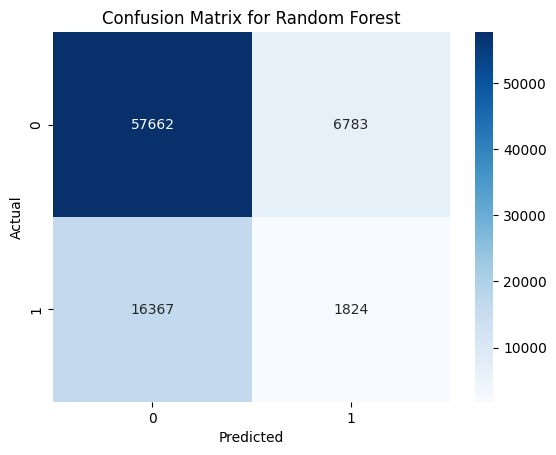


KNN Accuracy: 0.7368
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85     64445
           1       0.21      0.07      0.11     18191

    accuracy                           0.74     82636
   macro avg       0.49      0.50      0.48     82636
weighted avg       0.65      0.74      0.68     82636



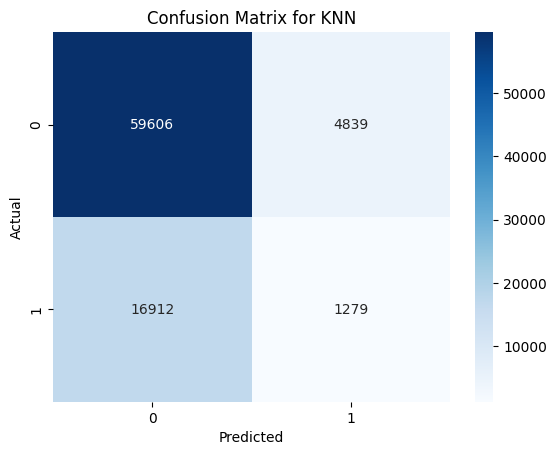


Gradient Boosting Accuracy: 0.7799
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     64445
           1       1.00      0.00      0.00     18191

    accuracy                           0.78     82636
   macro avg       0.89      0.50      0.44     82636
weighted avg       0.83      0.78      0.68     82636



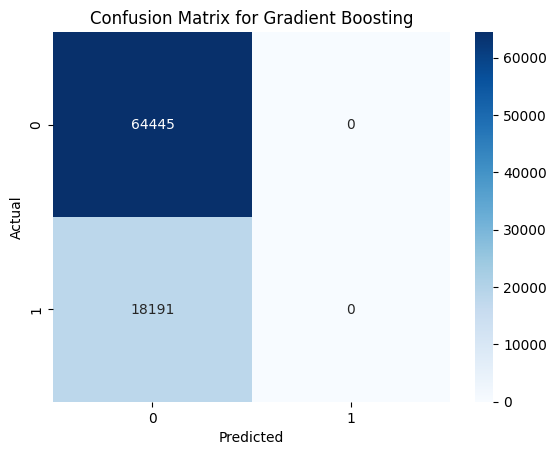

In [32]:
# Evaluasi model
models = {'Decission Tree':dt_model, 'Random Forest':rf_model, 'KNN':knn_model, 'Gradient Boosting':gb_model}

for name, model in models.items():
  y_pred = model.predict(X_test_selected)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'\n{name} Accuracy: {accuracy:.4f}')
  print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix for {name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [33]:
def evaluasi_model_train(models, X_train, y_train):
  results = []
  for name, model in models.items():
        y_pred = model.predict(X_train)
        accuracy = accuracy_score(y_train, y_pred)
        precision = precision_score(y_train, y_pred)
        recall = recall_score(y_train, y_pred)
        f1 = f1_score(y_train, y_pred)

        results.append([name, accuracy, precision, recall, f1])

  return pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Panggil fungsi
df_evaluasi_train = evaluasi_model_train(models, X_train_selected, y_train)
df_evaluasi_train

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,Decission Tree,0.779903,0.716814,0.001483,0.002960
1,Random Forest,0.811924,0.674910,0.282171,0.397960
2,KNN,0.789898,0.568168,0.192832,0.287939
3,Gradient Boosting,0.779705,0.000000,0.000000,0.000000


In [34]:
def evaluasi_model_test(models, X_test, y_test):
    results = []

    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        results.append([name, accuracy, precision, recall, f1])

    return pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

df_evaluasi_test = evaluasi_model_test(models, X_test_selected, y_test)
df_evaluasi_test

,Model,Accuracy,Precision,Recall,F1 Score
0,Decission Tree,0.779624,0.236842,0.000495,0.000987
1,Random Forest,0.719856,0.211921,0.100269,0.136130
2,KNN,0.736785,0.209055,0.070309,0.105229
3,Gradient Boosting,0.779866,0.000000,0.000000,0.000000


Proses evaluasi pada proyek ini akan menggunakan akurasi, confusion matrix, dan f1-score. Mengingat rasio nilai pada target tidak merata dengan nilai 1 lebih sedikit, maka evaluasi model akan lebih memperhatikan prediksi ke nilai 1 atau true positif (maka dari itu metrik f1-score lebih cocok).

1. **Decision Tree**, Akurasi pada pelatihan dan prediksi data 78%. Dari gambar di bawah, hanya 9 data yang diprediksi sebagai true positive. Diperoleh skor F1 pada prediksi 0,002.

2. **Random Forest**, terdapat 1824 data yang dapat diprediksi sebagai true positif pada model ini. Model ini mendapatkan akurasi pelatihan 0,98 dam akurasi prediksi 0,72 sedangkan nilai F1 pada prediksi 0,14

3. **KNN**, dapat memprediksi 1279 data sebagai true positif. Mendapatkan akurasi pelatihan 0,79 dan akurasi prediksi 0,73. Model mendapatkan skor f1 pada pelatihan 0,29 dan prediksi 0,1.

4. **Gradient Boosting**, model ini tidak dapat mengenali data true positif sehingga mendapatkan skor f1 pada pelatihan dan pengujian adalah 0. Namun masih bisa memprediksi nilai true false, memiliki akurasi pelatihan dan pengujian sebesar 78%.

Akurasi pada keseluruhan model belum menunjukkan akurasi yang cukup baik menyentuh angka rata-rata keseluruhan 78%. Hal ini dapat terjadi karena:
1. Persebaran pada data kategorikal terlalu menyebar dan model terlalu menggeneralisasi sehingga sulit untuk mengenali data, bahkan overfitting.
2. Meskipun persebaran data merata, target pada proyek ini yaitu `survived` memiliki sebaran yang tidak seimbang atau undersampling. Kasus pasien yang tidak selamat lebih banyak dibandingkan dengan pasien yang hidup.

Maka dari itu perlu dilakukan hyperparameter tunning pada model klasifikasi untuk mendapatkan model nilai memberikan akurasi, Precision, Recall dan F1 Score yang baik dengan memperhatikan *confussion matrix*.

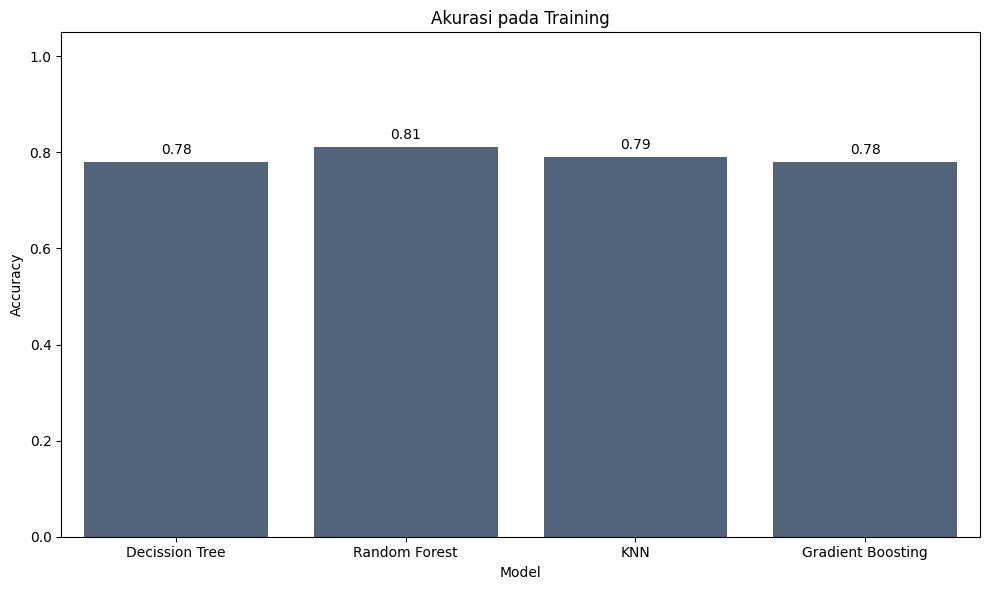

In [35]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df_evaluasi_train, x='Model', y='Accuracy', color="#4b6382")
# Tambahkan nilai akurasi di atas setiap bar
for i, row in df_evaluasi_train.iterrows():
    ax.text(i, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}",
            ha='center', va='bottom', color='black', fontsize=10)

plt.title('Akurasi pada Training')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

Berdasarkan gambar perbandingan akurasi di atas, model dengan akurasi tertinggi adalah Random Forest dan KNN. Selain akurasi, nilai F1 pada pelatihan dan prediksi merupakan nilai teringgi dengan jumlah kesalahan prediksi paling minimum dan paling banyak memprediksi nilai true positif, terutama pada model Random Forest.